In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import pyarrow.parquet as pq
import tools.utils as utils
from sklearn.feature_extraction.text import CountVectorizer
wr.filterwarnings('ignore')

In [ ]:
# df = pd.read_parquet('data/train-00000-of-00002.parquet')
table = pq.read_table('data/cleaned_jigsaw.parquet')
df = table.to_pandas()
print(df.head())

                                        comment_text  non_toxic  toxic  \
0  explanation edits made username hardcore metal...          1    0.0   
1  aww matches background colour seemingly stuck ...          1    0.0   
2  hey man really trying edit war guy constantly ...          1    0.0   
3  make real suggestions improvement wondered sec...          1    0.0   
4                      sir hero chance remember page          1    0.0   

   severe_toxic  obscene  threat  insult  identity_hate  
0           0.0      0.0     0.0     0.0            0.0  
1           0.0      0.0     0.0     0.0            0.0  
2           0.0      0.0     0.0     0.0            0.0  
3           0.0      0.0     0.0     0.0            0.0  
4           0.0      0.0     0.0     0.0            0.0  


Số lượng positive mỗi nhãn:
non_toxic        1580580
toxic             619138
severe_toxic      117797
obscene           175183
threat            118870
insult            514552
identity_hate     243635
dtype: int64

Tỷ lệ positive mỗi nhãn:
non_toxic        0.710993
toxic            0.278507
severe_toxic     0.052989
obscene          0.078803
threat           0.053471
insult           0.231461
identity_hate    0.109594
dtype: float64


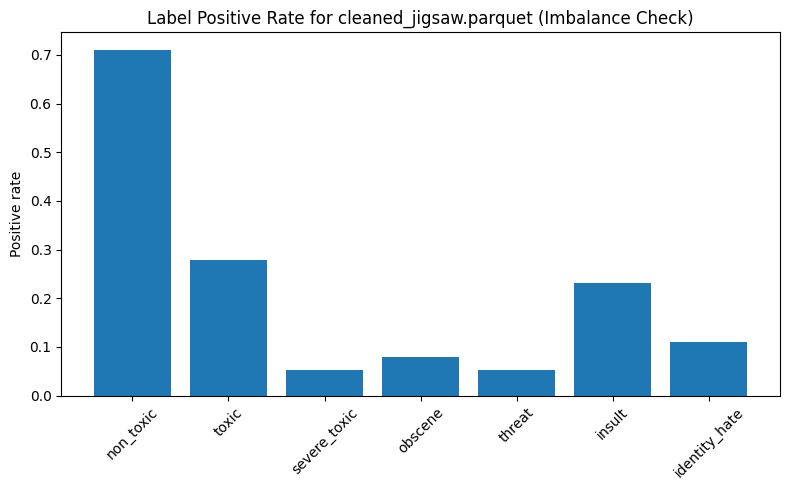

In [ ]:
# Cell 2: Label distribution

label_cols = ["non_toxic", "toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Số lượng "1" (positive) cho từng nhãn
label_counts = df[label_cols].ne(0).sum()

# Tỷ lệ positive (so với tổng số dòng)
label_rates = label_counts / len(df)

print("Số lượng positive mỗi nhãn:")
print(label_counts)
print("\nTỷ lệ positive mỗi nhãn:")
print(label_rates)

# Vẽ bar chart
plt.figure(figsize=(8, 5))
plt.bar(label_cols, label_rates)
plt.title("Label Positive Rate for cleaned_jigsaw.parquet (Imbalance Check)")
plt.ylabel("Positive rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


                    mean  median
toxic (0)      28.618443    20.0
non_toxic (1)  26.866589    17.0


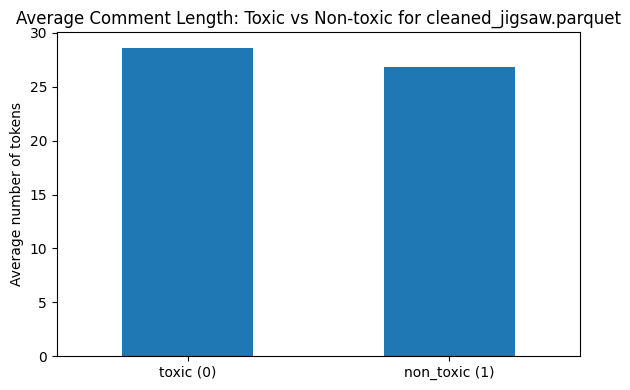

In [25]:
# Cell 3: Length statistics

# Độ dài comment theo số từ
df["comment_length"] = df["comment_text"].str.split().str.len()

# Nhóm theo non_toxic
length_stats = df.groupby("non_toxic")["comment_length"].agg(["mean", "median"])
length_stats.index = ["toxic (0)", "non_toxic (1)"]
print(length_stats)

# Vẽ biểu đồ so sánh độ dài trung bình
plt.figure(figsize=(6, 4))
length_stats["mean"].plot(kind="bar")
plt.title("Average Comment Length: Toxic vs Non-toxic for cleaned_jigsaw.parquet")
plt.ylabel("Average number of tokens")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Cell 5: Split groups

# Toxic group = non_toxic == 0
toxic_mask = df["non_toxic"] == 0
non_toxic_mask = df["non_toxic"] == 1

toxic_texts = df.loc[toxic_mask, "comment_text"]
non_toxic_texts = df.loc[non_toxic_mask, "comment_text"]

print("Toxic comments:", len(toxic_texts))
print("Non-toxic comments:", len(non_toxic_texts))

Toxic comments: 642481
Non-toxic comments: 1580580


In [ ]:
# Cell 6: Top N unigrams (words)

TOP_K = 20

top_words_toxic = utils.get_top_ngrams(toxic_texts, ngram_range=(1,1), top_k=TOP_K)
top_words_non_toxic = utils.get_top_ngrams(non_toxic_texts, ngram_range=(1,1), top_k=TOP_K)

print("Top words - TOXIC:")
for w, c in top_words_toxic:
    print(f"{w}: {c}")

print("\nTop words - NON-TOXIC:")
for w, c in top_words_non_toxic:
    print(f"{w}: {c}")

Top words - TOXIC:
people: 131016
trump: 128956
like: 112678
think: 58279
time: 57057
know: 55872
right: 55501
good: 46804
way: 46301
make: 44662
want: 43948
years: 40236
going: 40132
need: 39115
white: 38008
government: 37852
say: 36936
really: 35258
money: 34939
country: 34378

Top words - NON-TOXIC:
people: 235144
like: 212053
time: 143213
trump: 142997
think: 136771
article: 125972
good: 124966
know: 124449
way: 108697
right: 106709
make: 105583
years: 105248
need: 99105
state: 93129
want: 91041
government: 90215
going: 84445
money: 84338
tax: 83689
new: 79817


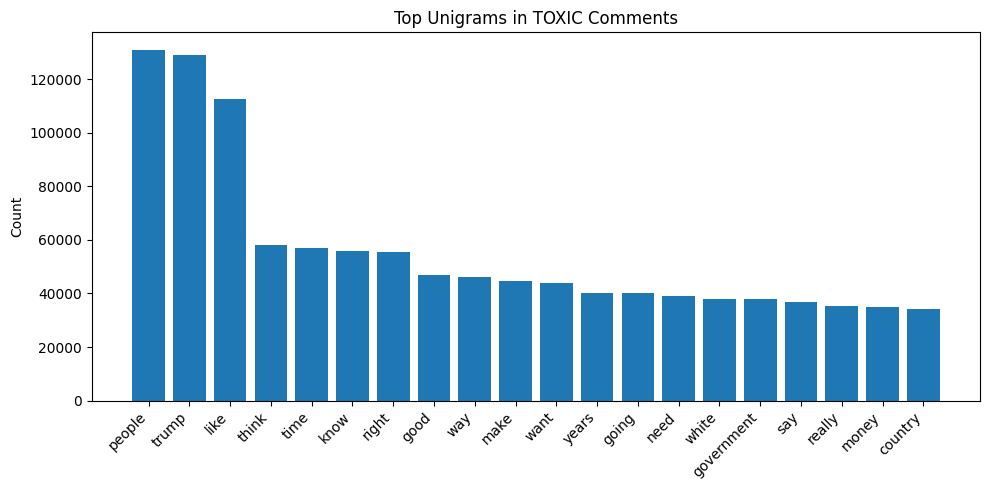

In [ ]:
# Bar chart top words toxic

words, counts = zip(*top_words_toxic)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title("Top Unigrams in TOXIC Comments")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


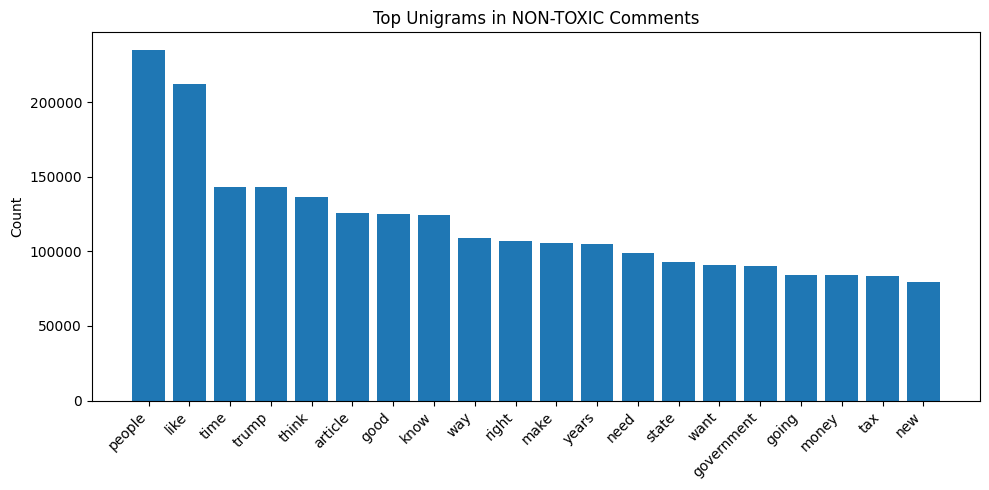

In [ ]:
words, counts = zip(*top_words_non_toxic)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title("Top Unigrams in NON-TOXIC Comments")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
# Cell 7: Top N bigrams

TOP_K = 20

top_bigrams_toxic = utils.get_top_ngrams(toxic_texts, ngram_range=(2,2), top_k=TOP_K)
top_bigrams_non_toxic = utils.get_top_ngrams(non_toxic_texts, ngram_range=(2,2), top_k=TOP_K)

print("Top bigrams - TOXIC:")
for w, c in top_bigrams_toxic:
    print(f"{w}: {c}")

print("\nTop bigrams - NON-TOXIC:")
for w, c in top_bigrams_non_toxic:
    print(f"{w}: {c}")

Top bigrams - TOXIC:
donald trump: 7336
fake news: 5883
fuck fuck: 5531
years ago: 5518
united states: 5473
health care: 5028
http www: 4996
white house: 4818
https www: 4688
people like: 4664
right wing: 4212
president trump: 4055
sounds like: 3888
year old: 3818
nigger nigger: 3577
looks like: 3464
left wing: 3363
climate change: 3218
free speech: 3135
white people: 3068

Top bigrams - NON-TOXIC:
http www: 21786
talk page: 16363
years ago: 15413
https www: 14744
health care: 14054
united states: 11421
climate change: 9391
sounds like: 8752
donald trump: 8582
income tax: 8272
looks like: 8121
fake news: 6925
real estate: 6462
supreme court: 6430
long term: 5993
long time: 5977
people like: 5940
federal government: 5911
middle class: 5868
president trump: 5772


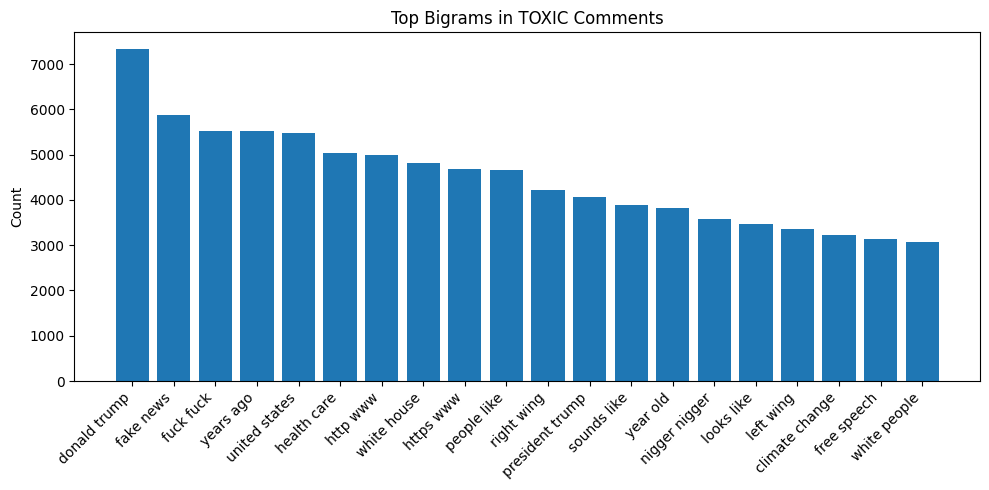

In [ ]:
# Bar chart top bigrams toxic
bigrams, counts = zip(*top_bigrams_toxic)

plt.figure(figsize=(10, 5))
plt.bar(bigrams, counts)
plt.title("Top Bigrams in TOXIC Comments")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


===== Top 20 UNIGRAMS for label = severe_toxic =====
trump: 19945
people: 18689
like: 17325
stupid: 9345
fuck: 7863
think: 7604
white: 7591
right: 7565
know: 7477
time: 7256
want: 6225
way: 5927
good: 5901
make: 5828
going: 5779
country: 5249
need: 5218
say: 5026
really: 4996
man: 4672


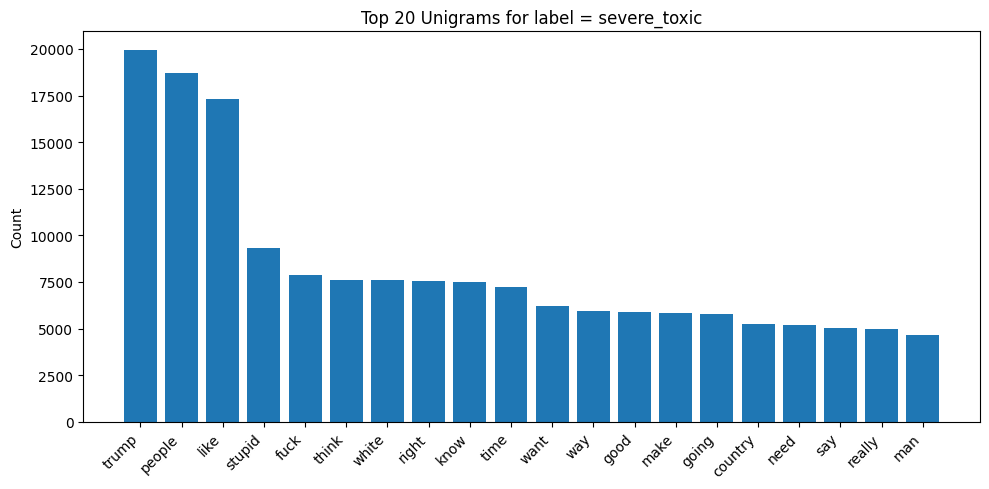


===== Top 20 UNIGRAMS for label = obscene =====
people: 19396
trump: 19175
like: 18772
stupid: 9463
think: 8995
know: 8847
fuck: 8842
time: 8424
right: 8132
want: 6900
good: 6870
make: 6812
way: 6751
going: 6632
say: 5792
need: 5764
really: 5754
years: 5561
money: 5127
white: 4944


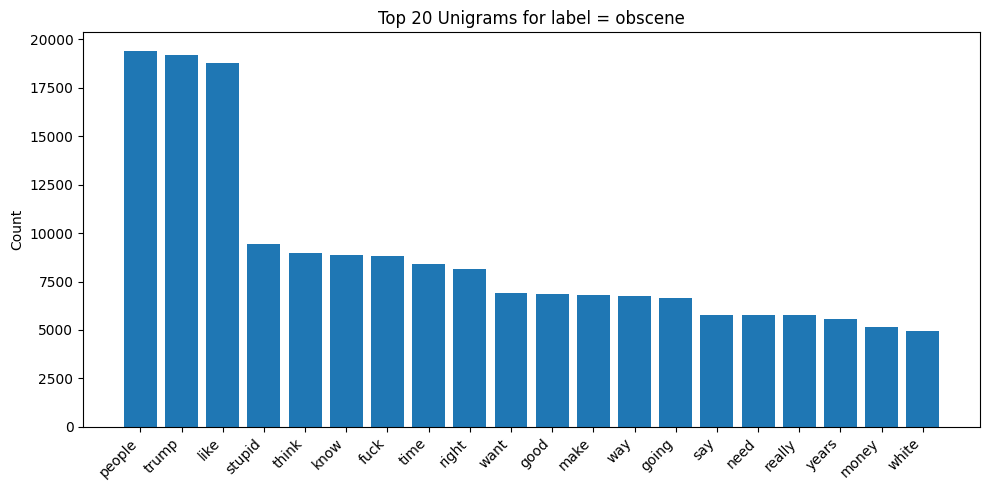


===== Top 20 UNIGRAMS for label = threat =====
people: 21540
trump: 16535
like: 16005
time: 8889
right: 8122
think: 7919
kill: 7802
know: 7686
going: 6940
good: 6909
want: 6849
way: 6756
make: 6253
need: 6079
white: 5844
years: 5344
let: 5214
country: 5189
say: 5075
really: 4679


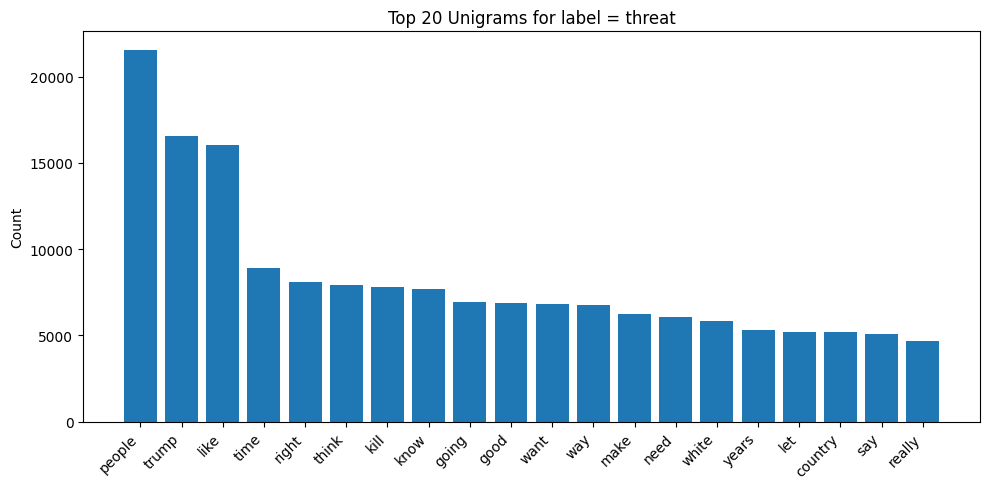


===== Top 20 UNIGRAMS for label = insult =====
trump: 22276
people: 20538
like: 18111
think: 9208
right: 8745
know: 8718
time: 8627
good: 7297
way: 7145
make: 6992
want: 6782
going: 6240
years: 6157
need: 5997
white: 5984
government: 5898
say: 5735
money: 5653
country: 5422
really: 5415


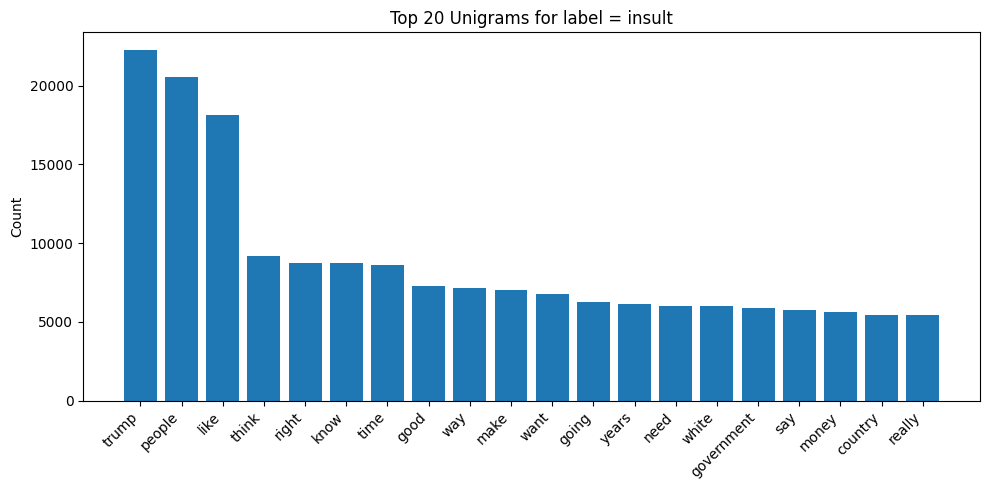


===== Top 20 UNIGRAMS for label = identity_hate =====
people: 23903
trump: 20761
like: 17878
white: 13174
right: 9848
think: 9341
women: 8456
know: 8444
time: 8172
want: 7523
country: 7168
way: 7155
canada: 7072
make: 7008
good: 6947
black: 6926
world: 6243
need: 6125
years: 6044
say: 6005


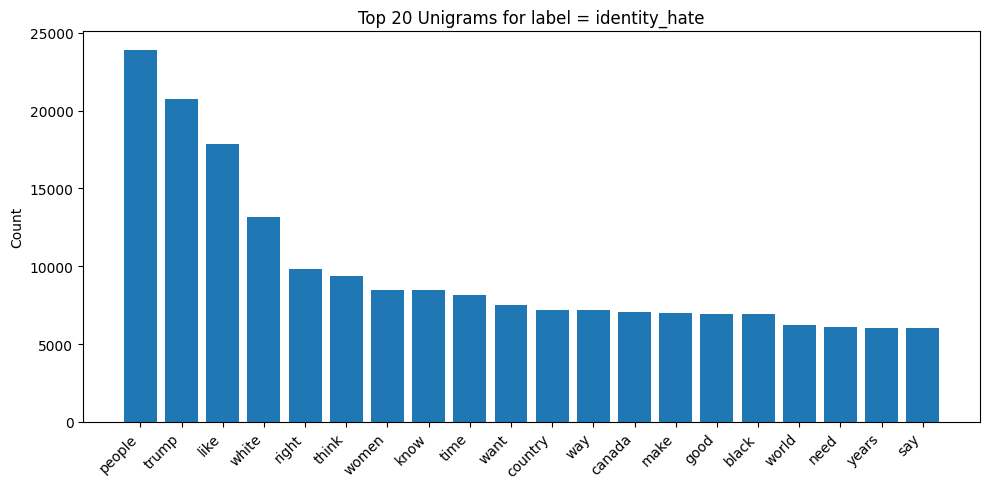

In [22]:
target_labels = ["severe_toxic", "obscene", "threat", "insult", "identity_hate"]
TOP_K = 20

for label in target_labels:
    # Chọn các comment có nhãn này (label > 0)
    texts = df.loc[df[label] > 0, "comment_text"]
    
    # Optional: sample nếu quá lớn để nhanh hơn
    max_samples = 100000
    if len(texts) > max_samples:
        texts = texts.sample(max_samples, random_state=42)

    top_unigrams = utils.get_top_ngrams(texts, ngram_range=(1, 1), top_k=TOP_K)
    print(f"\n===== Top {TOP_K} UNIGRAMS for label = {label} =====")
    for w, c in top_unigrams:
        print(f"{w}: {c}")
    
    # Vẽ bar chart
    words, counts = zip(*top_unigrams)
    
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(f"Top {TOP_K} Unigrams for label = {label}")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()



===== Top 20 BIGRAMS for label = severe_toxic =====
fuck fuck: 2233
ass ass: 1130
shit shit: 1094
donald trump: 1017
ha ha: 829
people like: 827
white house: 793
united states: 759
left wing: 734
white people: 731
fake news: 729
year old: 650
die die: 649
years ago: 641
right wing: 614
https www: 577
president trump: 555
sounds like: 553
health care: 516
suck suck: 514


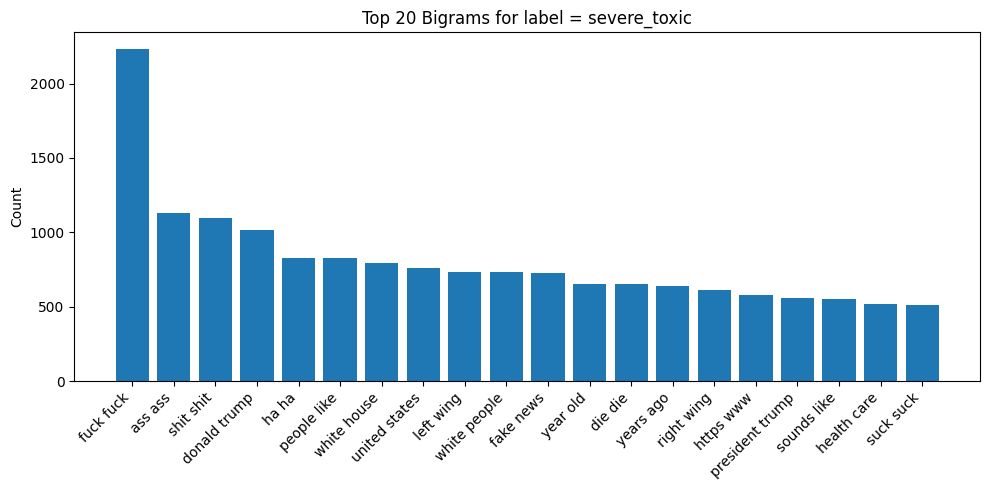


===== Top 20 BIGRAMS for label = obscene =====
fuck fuck: 2107
nigger nigger: 2060
shit shit: 1246
donald trump: 982
white house: 805
people like: 791
years ago: 780
suck suck: 771
fake news: 756
year old: 665
united states: 659
left wing: 627
http www: 617
https www: 595
right wing: 579
health care: 573
ha ha: 565
penis penis: 557
president trump: 557
sounds like: 554


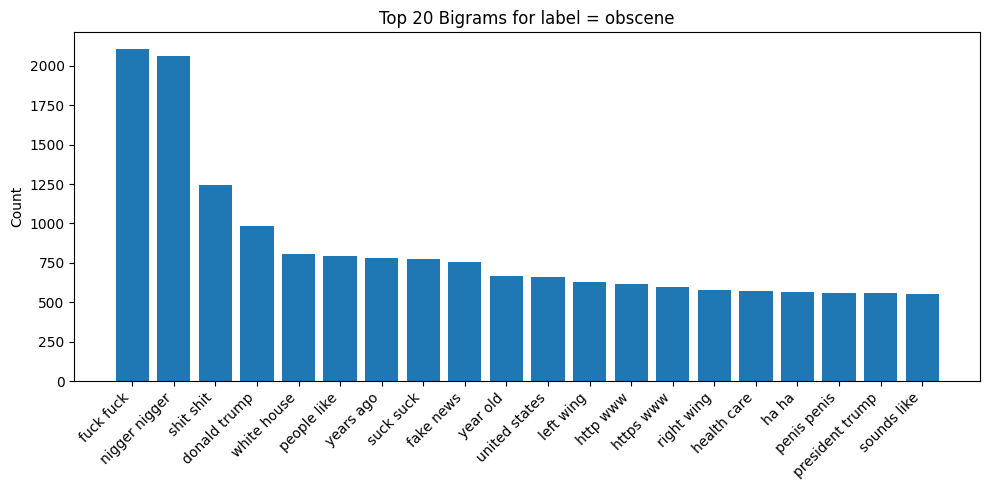


===== Top 20 BIGRAMS for label = threat =====
donald trump: 915
north korea: 858
united states: 792
year old: 775
years ago: 735
people like: 706
http www: 689
https www: 687
white house: 670
die die: 661
death penalty: 656
ha ha: 640
kill people: 621
sounds like: 606
health care: 595
president trump: 591
fake news: 566
white people: 531
right wing: 487
middle east: 473


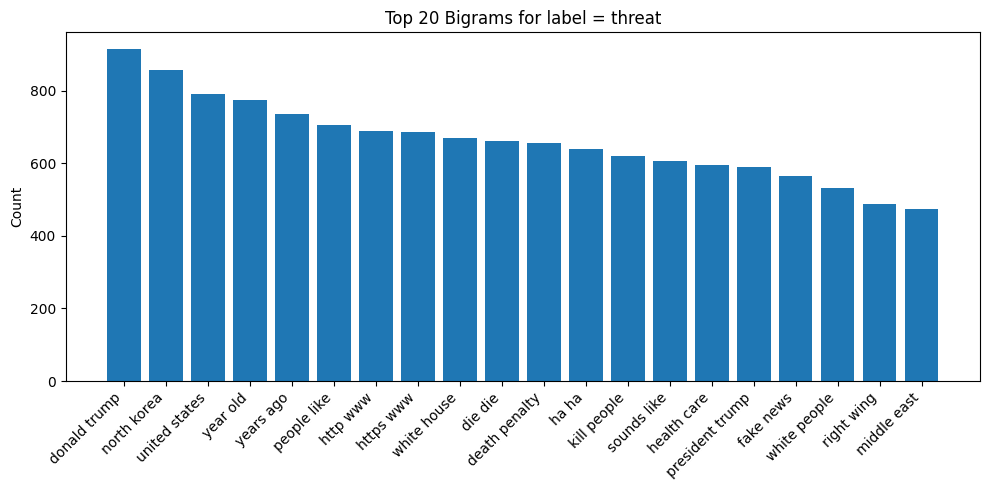


===== Top 20 BIGRAMS for label = insult =====
donald trump: 1198
fake news: 1064
united states: 870
white house: 839
years ago: 805
people like: 804
health care: 768
http www: 754
right wing: 728
president trump: 682
https www: 661
year old: 626
left wing: 596
sounds like: 595
looks like: 583
hillary clinton: 534
climate change: 524
mr trump: 508
free speech: 488
like trump: 453


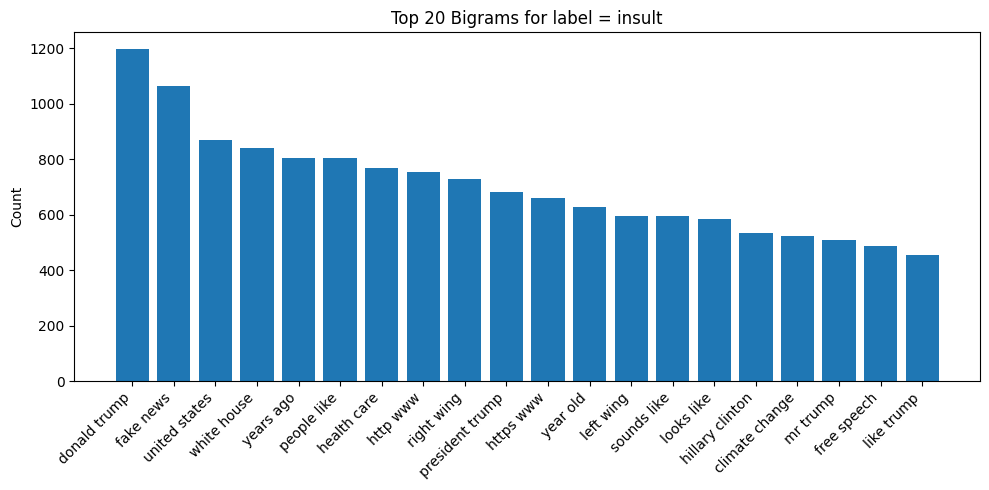


===== Top 20 BIGRAMS for label = identity_hate =====
white people: 1187
donald trump: 1183
united states: 1089
right wing: 900
nigger nigger: 892
years ago: 854
left wing: 828
white supremacists: 819
https www: 807
white house: 807
fake news: 766
http www: 762
people like: 762
catholic church: 742
white supremacist: 738
health care: 706
black people: 693
president trump: 678
north korea: 647
middle east: 622


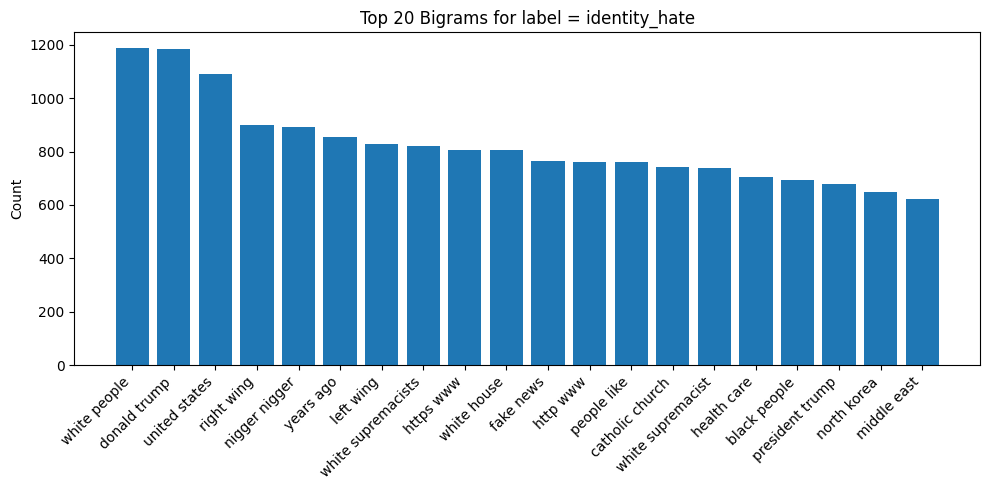

In [24]:
target_labels = ["severe_toxic", "obscene", "threat", "insult", "identity_hate"]
TOP_K = 20

for label in target_labels:
    texts = df.loc[df[label] > 0, "comment_text"]
    
    max_samples = 100000
    if len(texts) > max_samples:
        texts = texts.sample(max_samples, random_state=42)
    
    top_bigrams = utils.get_top_ngrams(texts, ngram_range=(2, 2), top_k=TOP_K)
    print(f"\n===== Top {TOP_K} BIGRAMS for label = {label} =====")
    for w, c in top_bigrams:
        print(f"{w}: {c}")
    
    bigrams, counts = zip(*top_bigrams)
    
    plt.figure(figsize=(10, 5))
    plt.bar(bigrams, counts)
    plt.title(f"Top {TOP_K} Bigrams for label = {label}")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()